# Load Data

In [1]:
import pandas as pd
import numpy as np

datavacc = pd.read_csv("dataset-isiberita.csv", sep=";", encoding="latin-1")
# melihat data
datavacc
# melihat jumlah baris dan kolom
# datavacc.shape

isi berita          tanggal  \
0     Beredar kabar di Facebook bahwa MUI sudah mela...        07-Oct-20   
1     Telah beredar pesan berantai di WhatsApp yang ...        07-Oct-20   
2     Hasil Periksa Fakta Khairunnisa Andini (Univer...        19-Oct-20   
3     Penjelasan : Beredar narasi di sosial media kl...        03-Nov-20   
4     Penjelasan : Beredar di media sosial sebuah po...        03-Nov-20   
...                                                 ...              ...   
1448  JAKARTA - Indonesia akan memulai program vaksi...  11 Januari 2022   
1449  JAKARTA - Sejauh ini ada yang sudah lolos uji ...  26 Agustus 2021   
1450  JAKARTA - Satgas Penanganan COVID-19 meminta m...        23-Dec-21   
1451  IDI melihat bahwa program vaksinasi adalah sal...        15-Dec-20   
1452  BILL GATES CONFESSIONBill Gates has demanded t...        23-Jan-22   

            Kategori Sumber  \
0                  Facebook   
1            pesan whatsapp   
2                  Facebook   
3                   Kominfo   
4                   Kominfo   
...                     ...   
1448  Website Covid19.co.id   
1449  Website Covid19.co.id   
1450  Website Covid19.co.id   
1451  Website Covid19.co.id   
1452         Pesan Whatsapp   

                                                   link  label  
0     https://covid19.go.id/artikel/2020/10/07/awas-...      1  
1                                                     -      1  
2                              https://archive.vn/cEu8t      1  
3     https://www.liputan6.com/news/read/4389620/sat...      1  
4     https://www.kominfo.go.id/content/detail/30566...      1  
...                                                 ...    ...  
1448  https://covid19.go.id/artikel/2022/01/11/vaksi...      0  
1449  https://covid19.go.id/artikel/2021/08/26/mixin...      0  
1450  https://covid19.go.id/artikel/2021/12/23/satga...      0  
1451  https://covid19.go.id/artikel/2020/12/15/idi-o...      0  
1452                           https://archive.ph/fcerl      1  

[1453 rows x 5 columns]

In [2]:
datavacc.shape

(1453, 5)

In [3]:
datavacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   isi berita       1453 non-null   object
 1   tanggal          1453 non-null   object
 2   Kategori Sumber  1453 non-null   object
 3   link             1453 non-null   object
 4   label            1453 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 56.9+ KB


In [4]:
display("Data ",datavacc.describe())

'Data '

label
count  1453.000000
mean      0.306951
std       0.461388
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

Cek Missing Values

In [5]:
# mengecek data nan
def null_table(datavacc):
#     print("Test Data Frame")
    print(pd.isnull(datavacc).sum())

null_table(datavacc)

isi berita         0
tanggal            0
Kategori Sumber    0
link               0
label              0
dtype: int64


Check Duplicate

In [6]:
print("Data :",datavacc.duplicated().sum())

Data : 2


In [7]:
datavacc.drop_duplicates(keep = False, inplace = True)

In [8]:
print("Data :",datavacc.duplicated().sum())

Data : 0


# Analisis Deskriptif

In [9]:
# melihat banyak nya jumlah judul berita HOAX = 1 dan berita SALAH = 0
datavacc['label'].value_counts()

0    1007
1     442
Name: label, dtype: int64

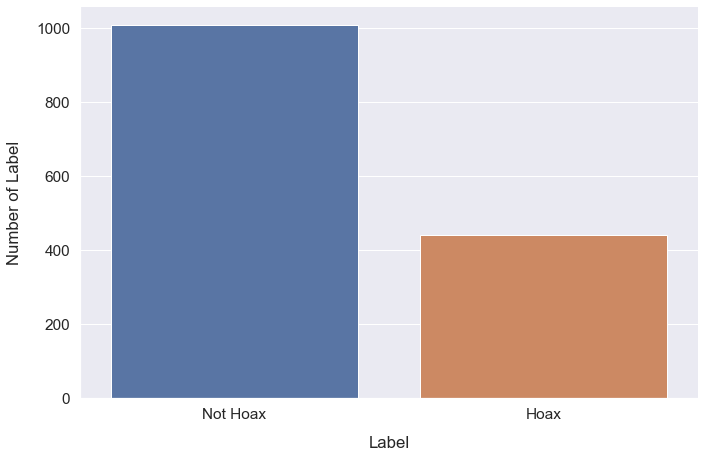

In [10]:
import matplotlib.pyplot as plt
# _, ax1 = plt.subplots(figsize=(6,5))
# stars_histogram = datavacc['label'].value_counts().sort_index()
# stars_histogram.plot(kind='bar', width=0.7, color='cyan')
# plt.xlabel('label')
# plt.ylabel('jumlah judul')

# plt.tight_layout()
# plt.show

import seaborn as sns
sns.set(font_scale=1.4)
g = sns.catplot(x='label', kind='count', data=datavacc, height=6.27, aspect=9.7/6.27)
g.set_xticklabels(['Not Hoax', 'Hoax'])
plt.xlabel("Label", labelpad=14)
plt.ylabel("Number of Label", labelpad=14)
plt.show()

Preprocessing (Mengubah dataset agar dapat diolah pada algoritam ML)

In [11]:
# menghapus baris jika ada data kosong
datavacc= datavacc.dropna()
datavacc.shape

(1449, 5)

Case Folding

In [12]:
# Mengubah semua huruf kapital menjadi huruf kecil atau lower text

datavacc['isi berita'] = datavacc['isi berita'].str.lower()
datavacc.head(2)

isi berita    tanggal  \
0  beredar kabar di facebook bahwa mui sudah mela...  07-Oct-20   
1  telah beredar pesan berantai di whatsapp yang ...  07-Oct-20   

  Kategori Sumber                                               link  label  
0        Facebook  https://covid19.go.id/artikel/2020/10/07/awas-...      1  
1  pesan whatsapp                                                  -      1

In [13]:
datavacc.to_csv("CaseFolding-isiberita.csv", index=False)

Cleansing 

In [14]:
# pembersihan text dari tab, new line, back slice, mention, link, hastag dan URL

import string
# regex library
import re 

def clean_text(text):
    # menghapus newline, tab dan back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
    # menghapus non ASCII (emoticon, chiness word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hastag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\s+)"," ", text).split())
    # menghapus incomplete URL
    return text.replace("htpp://", " ").replace("htpps://"," ")

datavacc['isi berita'] = datavacc['isi berita'].apply(clean_text)
datavacc.head(5)

isi berita    tanggal  \
0  beredar kabar di facebook bahwa mui sudah mela...  07-Oct-20   
1  telah beredar pesan berantai di whatsapp yang ...  07-Oct-20   
2  hasil periksa fakta khairunnisa andini (univer...  19-Oct-20   
3  penjelasan : beredar narasi di sosial media kl...  03-Nov-20   
4  penjelasan : beredar di media sosial sebuah po...  03-Nov-20   

  Kategori Sumber                                               link  label  
0        Facebook  https://covid19.go.id/artikel/2020/10/07/awas-...      1  
1  pesan whatsapp                                                  -      1  
2        Facebook                           https://archive.vn/cEu8t      1  
3         Kominfo  https://www.liputan6.com/news/read/4389620/sat...      1  
4         Kominfo  https://www.kominfo.go.id/content/detail/30566...      1

In [15]:
datavacc.to_csv("Cleansing-isiberita.csv", index=False)

In [16]:
# Remove Number

def remove_number(text):
    return re.sub(r"\d+", "", text)

datavacc['isi berita'] = datavacc['isi berita'].apply(remove_number)
datavacc.head(2)

isi berita    tanggal  \
0  beredar kabar di facebook bahwa mui sudah mela...  07-Oct-20   
1  telah beredar pesan berantai di whatsapp yang ...  07-Oct-20   

  Kategori Sumber                                               link  label  
0        Facebook  https://covid19.go.id/artikel/2020/10/07/awas-...      1  
1  pesan whatsapp                                                  -      1

In [17]:
datavacc.to_csv("RemoveNumber-isiberita.csv", index=False)

In [18]:
# Remove Punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans("","", string.punctuation))

datavacc['isi berita'] = datavacc['isi berita'].apply(remove_punctuation)
datavacc.head(2)

isi berita    tanggal  \
0  beredar kabar di facebook bahwa mui sudah mela...  07-Oct-20   
1  telah beredar pesan berantai di whatsapp yang ...  07-Oct-20   

  Kategori Sumber                                               link  label  
0        Facebook  https://covid19.go.id/artikel/2020/10/07/awas-...      1  
1  pesan whatsapp                                                  -      1

In [19]:
datavacc.to_csv("RemovePunctuation-isiberita.csv", index=False)

In [20]:
# Remove Single Char

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b","", text)

datavacc['isi berita'] = datavacc['isi berita'].apply(remove_single_char)
datavacc.head(2)

isi berita    tanggal  \
0  beredar kabar di facebook bahwa mui sudah mela...  07-Oct-20   
1  telah beredar pesan berantai di whatsapp yang ...  07-Oct-20   

  Kategori Sumber                                               link  label  
0        Facebook  https://covid19.go.id/artikel/2020/10/07/awas-...      1  
1  pesan whatsapp                                                  -      1

In [21]:
datavacc.to_csv("SingleChar-isiberita.csv", index=False)

Tokenizing

In [22]:
#pemisahan teks menjadi potongan kata
 
from nltk.tokenize import word_tokenize
import nltk

# NLTK word token
def tokenz(text):
    token = nltk.word_tokenize(text)
    return token

datavacc['isi berita'] = datavacc['isi berita'].apply(tokenz) 
datavacc.head(2)

isi berita    tanggal  \
0  [beredar, kabar, di, facebook, bahwa, mui, sud...  07-Oct-20   
1  [telah, beredar, pesan, berantai, di, whatsapp...  07-Oct-20   

  Kategori Sumber                                               link  label  
0        Facebook  https://covid19.go.id/artikel/2020/10/07/awas-...      1  
1  pesan whatsapp                                                  -      1

In [23]:
datavacc.to_csv("Tokenizing-isiberita.csv", index=False)

In [24]:
datavacc['isi berita'].tolist()

[['beredar',
  'kabar',
  'di',
  'facebook',
  'bahwa',
  'mui',
  'sudah',
  'melarang',
  'penggunaan',
  'vaksin',
  'covid',
  'dari',
  'tiongkok',
  'ini',
  'hoaks',
  'faktanya',
  'klaim',
  'tersebut',
  'salah',
  'karena',
  'sekjen',
  'mui',
  'anwar',
  'abbas',
  'menyampaikan',
  'per',
  'oktober',
  'mui',
  'belum',
  'membahas',
  'soal',
  'vaksin',
  'covid',
  'dikarenakan',
  'vaksin',
  'masih',
  'dalam',
  'tahap',
  'uji',
  'klinis',
  'dan',
  'mui',
  'belum',
  'bisa',
  'keluarkan',
  'fatwa',
  'atau',
  'putusan',
  'apapun',
  'terkaitnya'],
 ['telah',
  'beredar',
  'pesan',
  'berantai',
  'di',
  'whatsapp',
  'yang',
  'berisi',
  'narasi',
  'bahwa',
  'menteri',
  'agama',
  'fachrul',
  'razi',
  'yang',
  'dikabarkan',
  'positif',
  'covid',
  'merupakan',
  'kabar',
  'hoaks',
  'berikut',
  'adalah',
  'isi',
  'narasi',
  'tersebut',
  'gawaaaaat',
  'yaaa',
  'kalau',
  'begitu',
  'waspada',
  'jgn',
  'mau',
  'di',
  'paksin',
  'me

Spell Normalization

In [25]:
# penyeragaman kata yang memiliki makna yang sama namun penulisan yang berbeda

normalizad_word = pd.read_excel("normalisasi.xlsx")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(doc):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in doc]

datavacc['isi berita'] = datavacc['isi berita'].apply(normalized_term) 
datavacc.head(2)

isi berita    tanggal  \
0  [beredar, kabar, di, facebook, bahwa, mui, sud...  07-Oct-20   
1  [telah, beredar, pesan, berantai, di, whatsapp...  07-Oct-20   

  Kategori Sumber                                               link  label  
0        Facebook  https://covid19.go.id/artikel/2020/10/07/awas-...      1  
1  pesan whatsapp                                                  -      1

In [26]:
datavacc.to_csv("Normalisasi-isiberita.csv", index=False)

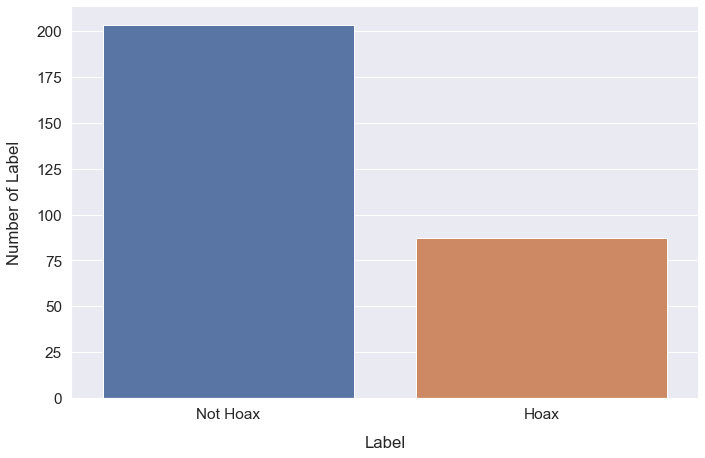

In [51]:
import seaborn as sns
sns.set(font_scale=1.4)
g = sns.catplot(x='label', kind='count', data=test, height=6.27, aspect=9.7/6.27)
g.set_xticklabels(['Not Hoax', 'Hoax'])
plt.xlabel("Label", labelpad=14)
plt.ylabel("Number of Label", labelpad=14)
plt.show()

RANDOM FOREST

In [52]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import gensim
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [53]:
list_accuracy, list_precision, list_recall, list_f1 = [], [], [], []

In [54]:
#split data use ratio 80:20

for i in range(5):
    # split dataset
    train, test = train_test_split(datavacc, test_size=0.2)

    # model gensim word2vec
    w2v_model = gensim.models.Word2Vec(train['isi berita'], vector_size=100, window=5, min_count=2) 

    # display word vectors for each word in the sentence
    words = set(w2v_model.wv.index_to_key)
    x_train_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in train['isi berita']]), dtype='object')

    x_test_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in test['isi berita']]), dtype='object')


    # calculate the sentence vector by averaging the word vector in the sentence
    x_train_vect_avg = []
    for v in x_train_vect:
        if v.size:
            x_train_vect_avg.append(v.mean(axis=0))
            
        else:
            x_train_vect_avg.append(np.zeros(100, dtype=float))

    x_test_vect_avg = []
    for v in x_test_vect:
        if v.size:
            x_test_vect_avg.append(v.mean(axis=0))
        else:
            x_test_vect_avg.append(np.zeros(100, dtype=float))

    # length of train and test average vector
    print(len(x_train_vect_avg), len(x_test_vect_avg))

    x_train_vect_avg = pd.DataFrame(x_train_vect_avg)

    x_test_vect_avg = pd.DataFrame(x_test_vect_avg)

    y_train = train['label']
    y_test = test['label']

    # instantiating the random over sampler 
    ros = RandomOverSampler()
    # resampling X, y
    x_train_ros, y_train_ros = ros.fit_resample(x_train_vect_avg, y_train)
    # new class distribution 
    print(Counter(y_train_ros))

    
    # grid parameters for random forest
    parameters = {
        'n_estimators' : [50, 75, 100], 
        'min_samples_leaf' : [1, 2, 4],
        'min_samples_split' : [2, 5, 10]
    }

    # k-fold method cross validation
    kf=KFold(n_splits=5, shuffle=False) 
    model_rf = RandomForestClassifier(random_state=49)
    clf = GridSearchCV(model_rf,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=kf)                     # number of folds

    # train model
    clf.fit(x_train_ros,y_train_ros)
    
    print("Tuned Hyperparameters :", clf.best_params_)
    print("Best Accuracy :",clf.best_score_)

    # looking for the best parameters
    best_parameters = clf.best_params_

    # classification RF
    y_pred_rf = clf.predict(x_test_vect_avg)
    presisi = precision_score(y_test, y_pred_rf) 
    recall = recall_score(y_test, y_pred_rf) 
    accuracy = accuracy_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    print('Precision Test: {} / Recall Test: {} / Accuracy Test: {} / F1 Test: {}'.format( 
        round(presisi, 4), round(recall, 4), round(accuracy, 4), round(f1, 4)))

    # list of evaluation metric values
    list_accuracy.append(accuracy)
    list_precision.append(presisi)
    list_recall.append(recall)
    list_f1.append(f1)

1159 290
Counter({0: 803, 1: 803})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy : 0.9620266635707513
Precision Test: 0.8211 / Recall Test: 0.907 / Accuracy Test: 0.9138 / F1 Test: 0.8619
1159 290
Counter({0: 820, 1: 820})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy : 0.9640243902439025
Precision Test: 0.8835 / Recall Test: 0.8835 / Accuracy Test: 0.9172 / F1 Test: 0.8835
1159 290
Counter({0: 808, 1: 808})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}
Best Accuracy : 0.962274968466919
Precision Test: 0.9032 / Recall Test: 0.9231 / Accuracy Test: 0.9448 / F1 Test: 0.913
1159 290
Counter({0: 800, 1: 800})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}
Best Accuracy : 0.9525
Precision Test: 0.869 / Recall Test: 0.8795 / Accuracy Test: 0.9276 / F1 Test: 0.8743
1159 290
Counter({0:

In [55]:
print(list_accuracy, np.mean(list_accuracy)) 
print(list_precision, np.mean(list_precision))
print(list_recall, np.mean(list_recall))
print(list_f1, np.mean(list_f1))

[0.9137931034482759, 0.9172413793103448, 0.9448275862068966, 0.9275862068965517, 0.9172413793103448] 0.9241379310344827
[0.8210526315789474, 0.883495145631068, 0.9032258064516129, 0.8690476190476191, 0.8764044943820225] 0.870645139418254
[0.9069767441860465, 0.883495145631068, 0.9230769230769231, 0.8795180722891566, 0.8571428571428571] 0.8900419484652102
[0.861878453038674, 0.883495145631068, 0.9130434782608696, 0.8742514970059881, 0.8666666666666666] 0.8798670481206532


ADABOOST

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [57]:
list_accuracy_Adb, list_precision_Adb, list_recall_Adb, list_f1_Adb = [], [], [], []

In [59]:
for i in range(5):
    # split dataset
    train, test = train_test_split(datavacc, test_size=0.2)

     # model gensim word2vec
    w2v_model = gensim.models.Word2Vec(train['isi berita'], vector_size=100, window=5, min_count=2)

   # display word vectors for each word in the sentence
    words = set(w2v_model.wv.index_to_key)
    x_train_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in train['isi berita']]), dtype='object')

    x_test_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in test['isi berita']]), dtype='object')

    # calculate the sentence vector by averaging the word vector in the sentence
    x_train_vect_avg = []
    for v in x_train_vect:
        if v.size:
            x_train_vect_avg.append(v.mean(axis=0))
            
        else:
            x_train_vect_avg.append(np.zeros(100, dtype=float))

    x_test_vect_avg = []
    for v in x_test_vect:
        if v.size:
            x_test_vect_avg.append(v.mean(axis=0))
        else:
            x_test_vect_avg.append(np.zeros(100, dtype=float))


    # length of train and test average vector
    print(len(x_train_vect_avg), len(x_test_vect_avg))

    x_train_vect_avg = pd.DataFrame(x_train_vect_avg)

    x_test_vect_avg = pd.DataFrame(x_test_vect_avg)

    y_train = train['label']
    y_test = test['label']

    # instantiating the random over sampler 
    ros = RandomOverSampler()
    # resampling X, y
    x_train_ros, y_train_ros = ros.fit_resample(x_train_vect_avg, y_train)
    # new class distribution 
    print(Counter(y_train_ros))

    
    # parameter grid for Adaboost
    parameters = {
        'n_estimators' : [100, 150],
        'learning_rate' : [0.5, 0.01, 0.2, 0.3, 0.4]
    }

    # k-fold method cross validation
    kf=KFold(n_splits=5, shuffle=False) 
    model_adaboost = AdaBoostClassifier(random_state=49)
    clfdaboost = GridSearchCV(model_adaboost,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=kf)                     # number of folds

    # train model
    clfdaboost.fit(x_train_ros,y_train_ros)
    
    print("Tuned Hyperparameters adaboost:", clfdaboost.best_params_)
    print("Best Accuracy adaboost :",clfdaboost.best_score_)

    # looking for the best parameters
    best_parameters = clf.best_params_

    # classification Adaboost

    y_pred_adb = clfdaboost.predict(x_test_vect_avg)
    presisi = precision_score(y_test, y_pred_adb) 
    recall = recall_score(y_test, y_pred_adb) 
    accuracy = accuracy_score(y_test, y_pred_adb)
    f1 = f1_score(y_test, y_pred_adb)
    print('Precision Test: {} / Recall Test: {} / Accuracy Test: {} / F1 Test: {}'.format( 
        round(presisi, 4), round(recall, 4), round(accuracy, 4), round(f1, 4)))

    # list of evaluation metric values
    list_accuracy_Adb.append(accuracy)
    list_precision_Adb.append(presisi)
    list_recall_Adb.append(recall)
    list_f1_Adb.append(f1)

1159 290
Counter({0: 803, 1: 803})
Tuned Hyperparameters adaboost: {'learning_rate': 0.2, 'n_estimators': 150}
Best Accuracy adaboost : 0.9551904955399468
Precision Test: 0.8824 / Recall Test: 0.8721 / Accuracy Test: 0.9276 / F1 Test: 0.8772
1159 290
Counter({0: 811, 1: 811})
Tuned Hyperparameters adaboost: {'learning_rate': 0.4, 'n_estimators': 150}
Best Accuracy adaboost : 0.9605565052231719
Precision Test: 0.8646 / Recall Test: 0.883 / Accuracy Test: 0.9172 / F1 Test: 0.8737
1159 290
Counter({0: 815, 1: 815})
Tuned Hyperparameters adaboost: {'learning_rate': 0.4, 'n_estimators': 100}
Best Accuracy adaboost : 0.9552147239263805
Precision Test: 0.8636 / Recall Test: 0.9694 / Accuracy Test: 0.9379 / F1 Test: 0.9135
1159 290
Counter({0: 796, 1: 796})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.9591865302340252
Precision Test: 0.8132 / Recall Test: 0.9367 / Accuracy Test: 0.9241 / F1 Test: 0.8706
1159 290
Counter({0: 806, 1: 806}

In [60]:
print(list_accuracy_Adb, np.mean(list_accuracy_Adb))
print(list_precision_Adb, np.mean(list_precision_Adb))
print(list_recall_Adb, np.mean(list_recall_Adb))
print(list_f1_Adb, np.mean(list_f1_Adb))

[0.9275862068965517, 0.9172413793103448, 0.9379310344827586, 0.9241379310344827, 0.9275862068965517] 0.926896551724138
[0.8823529411764706, 0.8645833333333334, 0.8636363636363636, 0.8131868131868132, 0.8541666666666666] 0.8555852235999296
[0.872093023255814, 0.8829787234042553, 0.9693877551020408, 0.9367088607594937, 0.9213483146067416] 0.9165033354256691
[0.8771929824561403, 0.8736842105263158, 0.9134615384615384, 0.8705882352941177, 0.8864864864864865] 0.8842826906449197
